In [72]:
import requests
def get_data(url):
    with open('page.html', 'w') as html:
        html.write(requests.get(url).text)
    with open('page.html', 'r') as html:
        for line in html:
            if 'var line1' in line:
                data = eval(line[13:-2])
    for i in range(len(data)):
        tmp = data[i][0].split()
        if tmp[3] != '01:':
            return data[i:]
        

In [73]:
import numpy
import talib
import requests
import json
import time

from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

url: https://steamcommunity.com/market/listings/730/Gamma%202%20Case


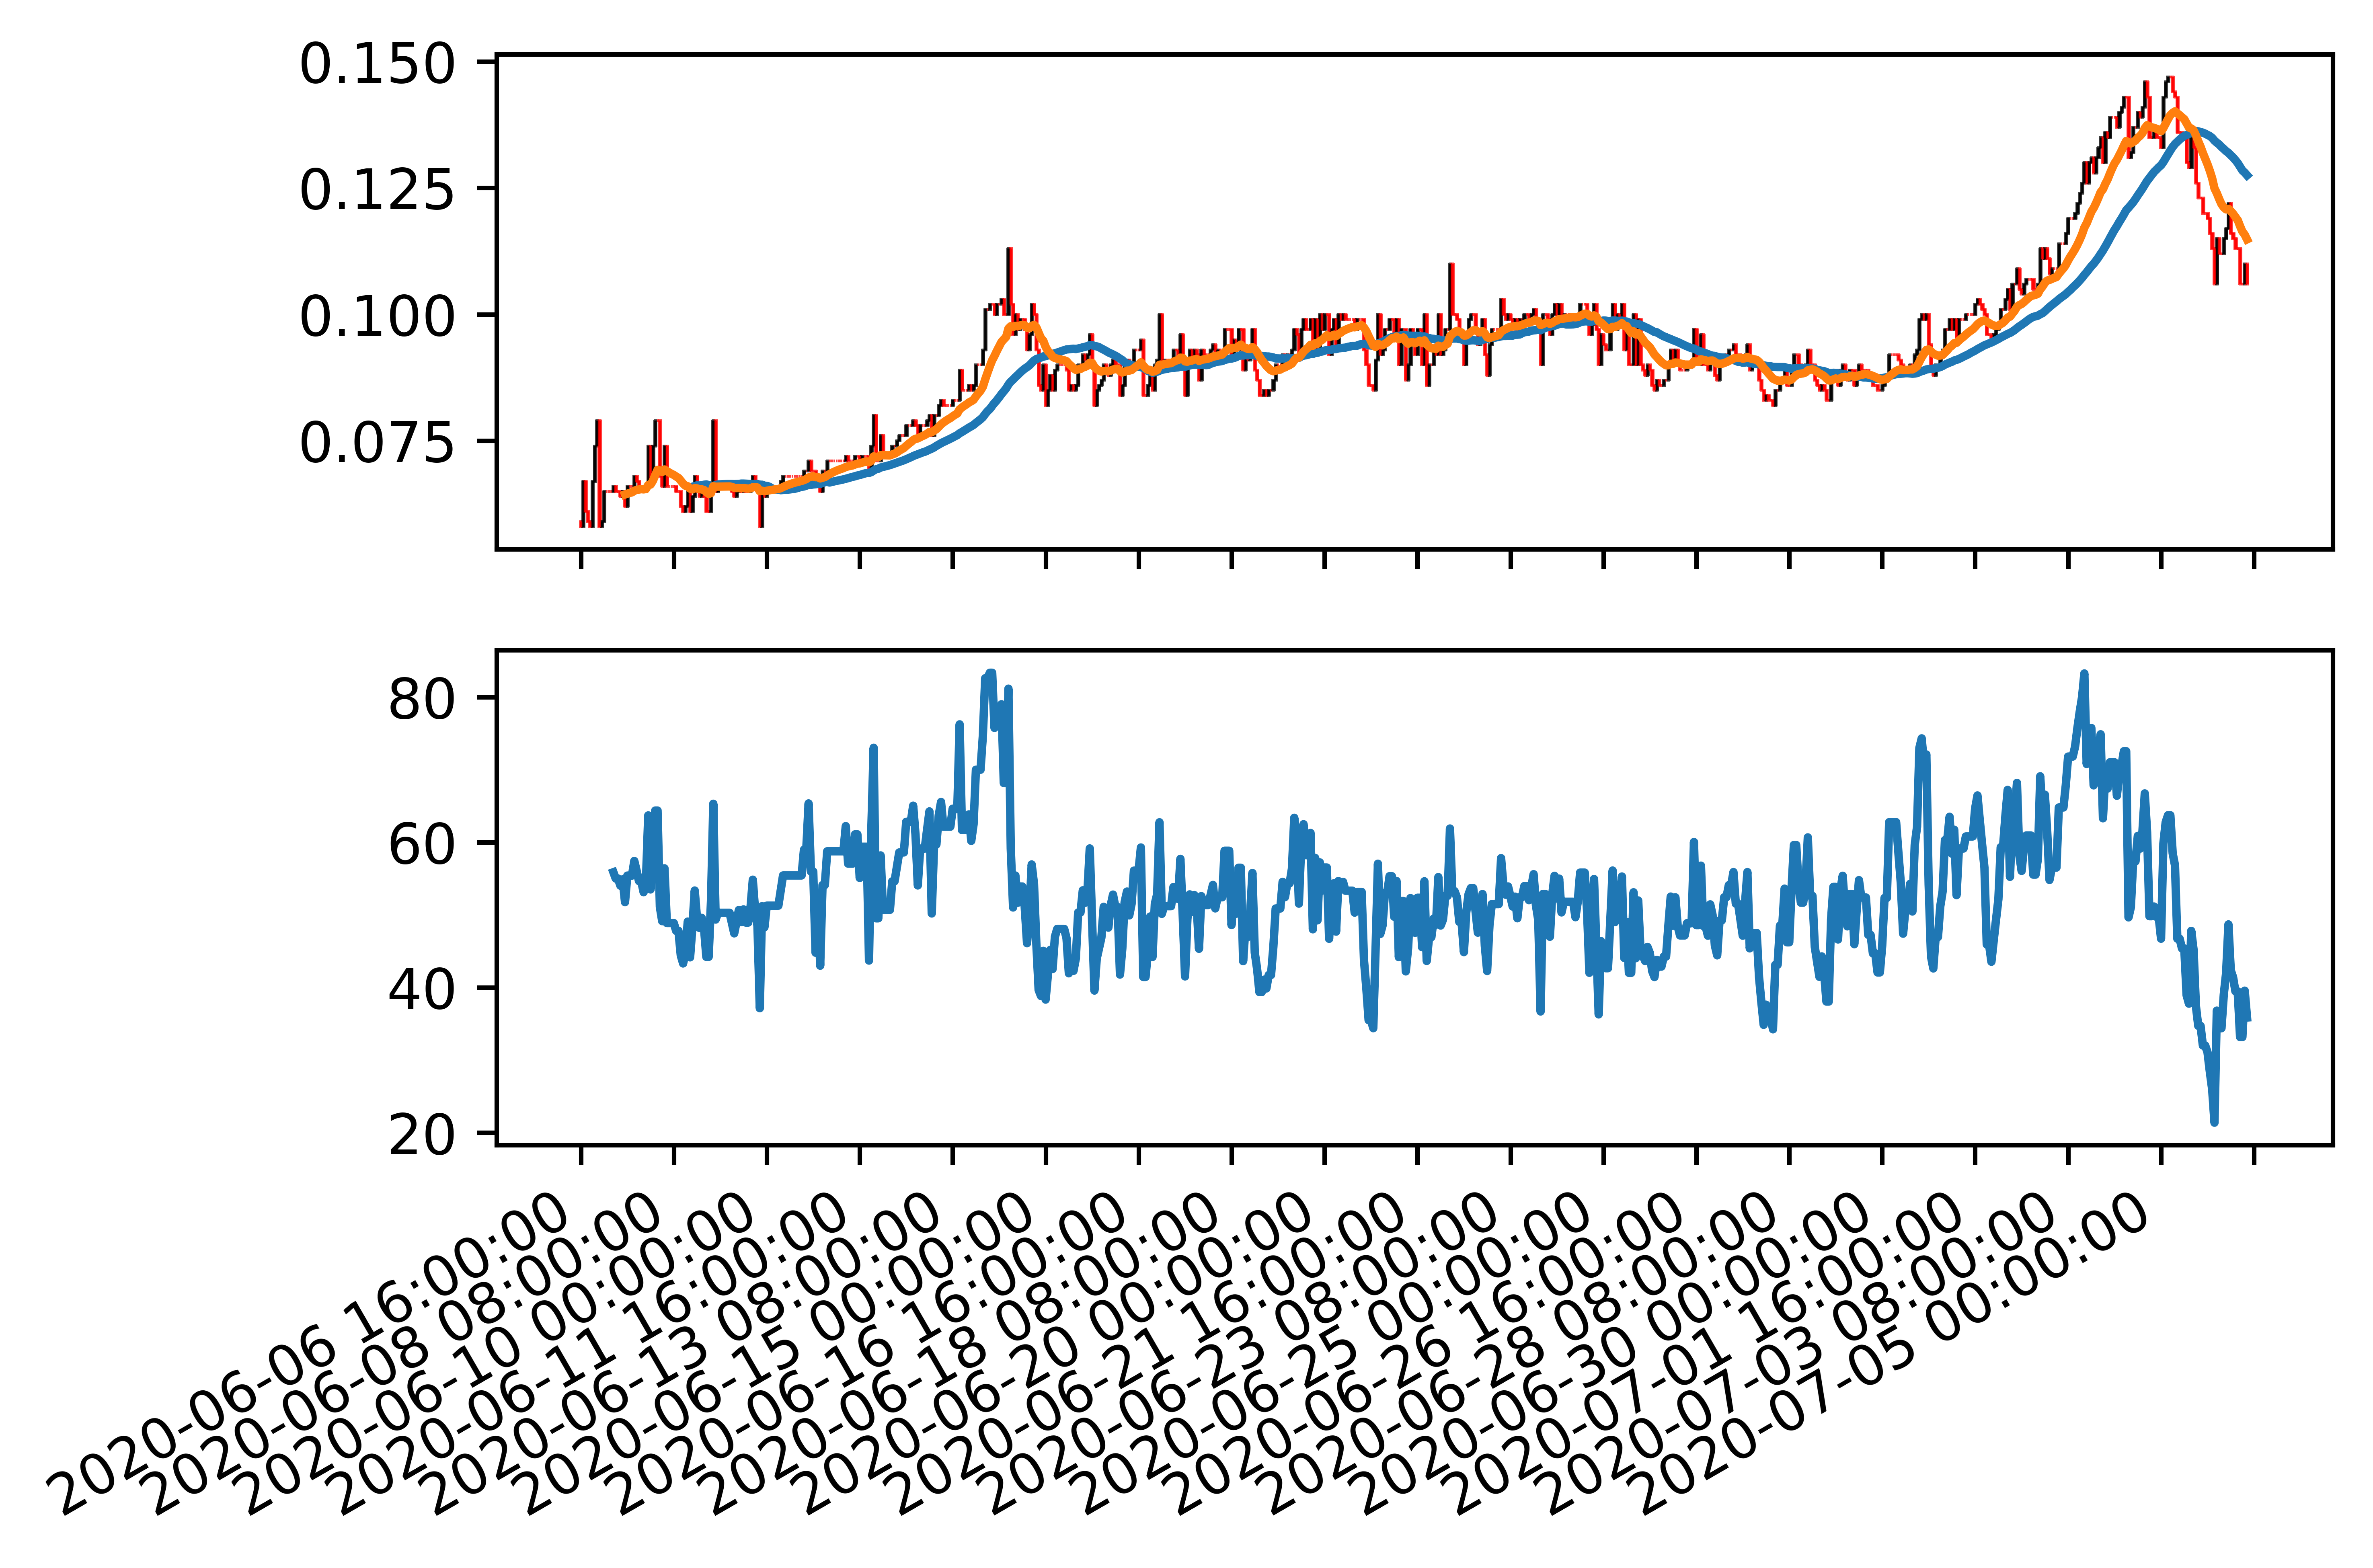

35.875229072532086


In [97]:
url = input('url: ')

data = get_data(url)

quotes = {}
quotes['open']=numpy.asarray([item[1] for item in data[:-1]])
quotes['close']=numpy.asarray([item[1] for item in data[1:]])
quotes['high']=numpy.asarray([max(open_price, close_price) for open_price, close_price in zip(quotes['open'], quotes['close'])])
quotes['low']=numpy.asarray([min(open_price, close_price) for open_price, close_price in zip(quotes['open'], quotes['close'])])

xdate=[datetime.datetime.fromtimestamp(datetime.datetime.strptime(str(item[0][:-3]), '%b %d %Y %H:').timestamp()) for item in data]

fig, ax = plt.subplots(2, sharex=True, dpi=1000)

candlestick2_ohlc(ax[0], quotes['open'],quotes['high'],quotes['low'],quotes['close'],width=0.6)

ax[0].xaxis.set_major_locator(ticker.MaxNLocator(20))

def chart_date(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(chart_date))

fig.autofmt_xdate()
fig.tight_layout()

sma = talib.SMA(quotes['close'], timeperiod=50)
ax[0].plot(sma)

ema = talib.EMA(quotes['close'], timeperiod=20)
ax[0].plot(ema)

rsi = talib.RSI(quotes['close'], timeperiod=14)
ax[1].plot(rsi)

"""macd, macdsignal, macdhist = talib.MACD(quotes['close'], fastperiod=12, slowperiod=26, signalperiod=9)
ax[1].plot(macd, color="y")
ax[1].plot(macdsignal)

hist_data = []
for elem in macdhist:
    if not numpy.isnan(elem):
        v = 0 if numpy.isnan(elem) else elem
        hist_data.append(v*100)
ax[2].fill_between([x for x in range(len(macdhist))], 0,macdhist)"""

plt.show()
print(rsi[-1])